## Imports


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 


In [10]:
df=pd.read_csv('Ecommerce Customers')


In [11]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [13]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**



In [15]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

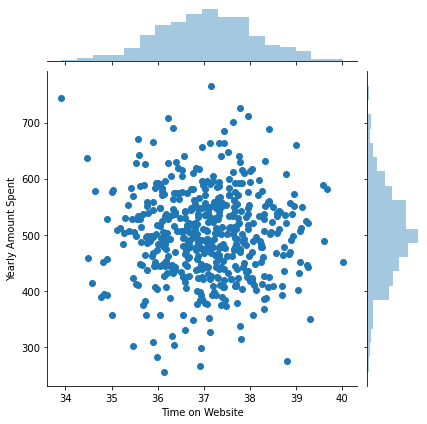

In [16]:
sns.jointplot(x=df['Time on Website'],y=df['Yearly Amount Spent'])

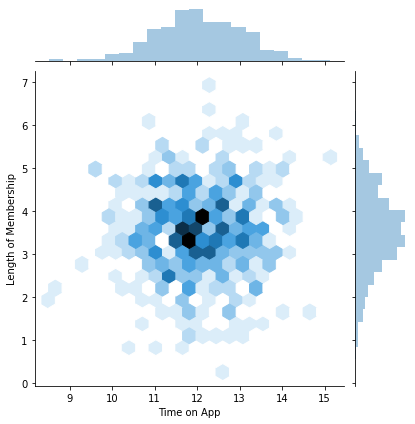

In [18]:
sns.jointplot(x=df['Time on App'],y=df['Length of Membership'],kind='hex')

**Let's explore these types of relationships across the entire data set**

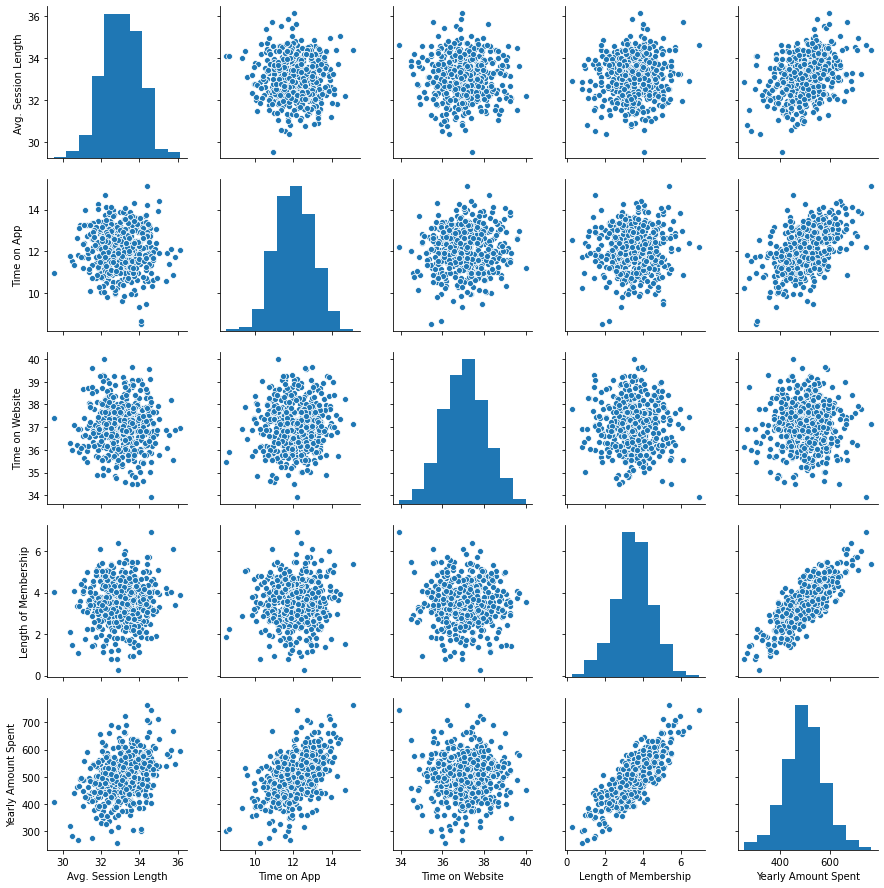

In [19]:
sns.pairplot(data=df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

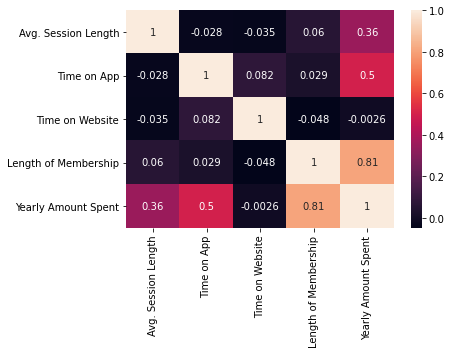

In [29]:
df.corr()
sns.heatmap(df.corr(),annot=True)

**Length of Membership x Yearly Amout Spent is the most correlated value 0,81**

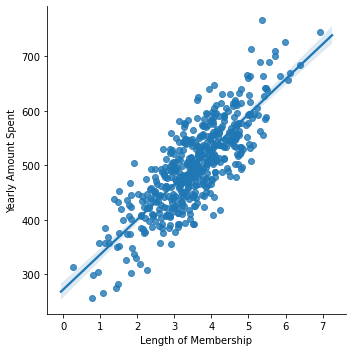

In [25]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

## Training and Testing Data

**Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets**

In [37]:
df.keys()
X=df[['Avg. Session Length','Time on App','Time on Website', 'Length of Membership']]
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [43]:
y=df[['Yearly Amount Spent']]
y

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092
...,...
495,573.847438
496,529.049004
497,551.620145
498,456.469510


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

**Now its time to train the model on the training data!**


In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lm=LinearRegression()

In [50]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print out the coefficients of the model**

In [51]:
lm.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!


In [105]:
pred=lm.predict(X_test)

Text(0, 0.5, 'Y Prev')

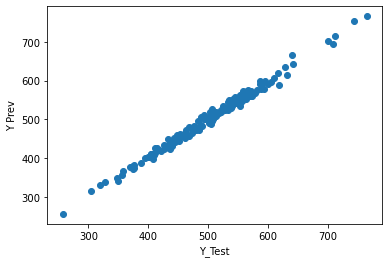

In [63]:
plt.scatter(y_test,pred)
plt.xlabel('Y_Test')
plt.ylabel('Y Prev')

## Evaluating the Model

**Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).**


In [64]:
from sklearn import metrics

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 7.228148653430855
Mean Squared Error: 79.81305165097481
Root Mean Squared Error: 8.933815066978655


## Residuals


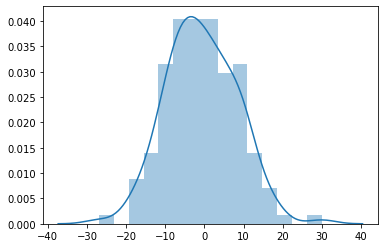

In [74]:
sns.distplot((y_test-pred),bins=15)

## Conclusion


In [102]:
coef=pd.DataFrame(lm.coef_)
X.columns
coef.columns=X.columns
coef

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,25.98155,38.590159,0.190405,61.279097


**This features will affect in the target value, when we change 1 unit of this features we will change de target value.example:
if we increased 1 unit in Time on Website we will increased 0.190405 in the Yearly Amount Spent**